In [1]:
%matplotlib inline
from keras import *
from keras.layers import *
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import LearningRateScheduler, TensorBoard
from sklearn.neural_networ k import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
df_train = pd.read_csv("train.csv",header=None,delimiter=',',dtype='float64',names=list(range(4096))).fillna(0)
X_train = df_train.get_values()
df_label = pd.read_csv("train_label.csv",delimiter=',')
Y_train = df_label['category'].get_values()
Y_train = Y_train.reshape(-1,1)
print(X_train.shape)

x_test = pd.read_csv("test.csv",header=None,delimiter=',',dtype='float64',names=list(range(4096))).fillna(0)
X_test = df_train.get_values()
print(x_test.shape)


Using TensorFlow backend.


(113636, 4096)
(133223, 4096)


In [7]:
maxlen = 4096
embed_size = 128
def scheduler(epoch):
    if epoch%1==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.5)
        print("lr changed to {}".format(lr*.5))
    return K.get_value(model.optimizer.lr)

lr_decay = LearningRateScheduler(scheduler)

main_input = Input(shape=(maxlen,), dtype='float64',name='main_input')
emb = Embedding(256, embed_size, input_length=maxlen,embeddings_regularizer=regularizers.l2(1e-4))(main_input)
x = Flatten()(emb)

num_layers = 2
for i in range(num_layers):
    x = Dense(10, activation='linear',kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = ELU()(x)
    x = Dropout(0.5)(x)

loss_out = Dense(1, activation='sigmoid',name='loss_out')(x)
model = Model(inputs=[main_input], outputs=[loss_out])
optimizer = Adam(lr=0.001) 
model.compile(optimizer, loss='binary_crossentropy', metrics=['mse', 'accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=200, epochs=5, verbose=1, callbacks=[lr_decay], validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

Epoch 1/5
 84600/113636 [=====================>........] - ETA: 3:28 - loss: 0.3278 - mean_squared_error: 0.0886 - acc: 0.8850

KeyboardInterrupt: 

dict_keys(['loss', 'mean_squared_error', 'acc'])


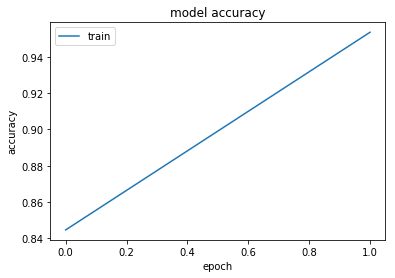

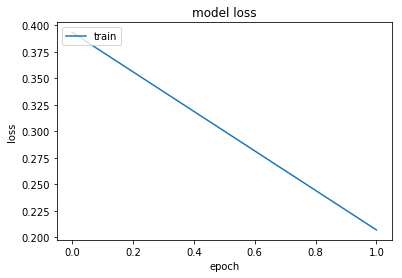

In [5]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
y=model.predict(x_test, batch_size=None, verbose=0, steps=None)
print(y.shape[0])

s=np.arange(y.shape[0]).astype(int)
a= np.zeros((y.shape[0],2)) 
a= np.vstack([s,y.reshape(-1)])
print(a.T)
np.savetxt("out.csv", a.T, delimiter=',', fmt='%i,%f', header="sample_id,malware", comments="")

In [ ]:
# model.save_weights('mlp_weights_98722.h5')
# model.save('mlp_98722.h5')